<a href="https://colab.research.google.com/github/RizkyPutraKurniawan24/Machine-Learning/blob/master/Supervised%20Learning/Classification/Decision%20Tree%20and%20Random%20Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree & Random Forest**

## **1. Decision Tree**

Decision Tree adalah jenis algoritma penting untuk predictive modeling machine learning.

Algoritme decision tree klasik telah ada selama beberapa dekade dan variasi modern seperti random forest adalah salah satu teknik paling ampuh yang tersedia.

Classification and Regression Tree atau disingkat (CART) adalah istilah yang diperkenalkan oleh `Leo Breiman` untuk merujuk pada algoritma decision tree yang dapat digunakan untuk classification atau regression predictive modeling problems.

Secara klasik, algoritme ini disebut sebagai `“Decision Tree”`, tetapi pada beberapa platform seperti R, algoritme ini disebut dengan istilah `CART` yang lebih modern.

Algoritme `CART` memberikan landasan bagi algoritma penting seperti `bagged decision trees`, `random forest` dan `boosted decision trees`.

### **CART Model Representation**

Representasi model CART adalah binary tree.

Ini adalah binary tree Anda dari algoritma dan struktur data, tidak ada yang terlalu mewah. Setiap root node mewakili satu input variable (x) dan splitting point pada variabel tersebut (dengan asumsi variabel tersebut numerik).

Leaf node pada tree berisi output variable (y) yang digunakan untuk membuat prediksi.

Jika ada new input, tree dilintasi dengan mengevaluasi masukan spesifik yang dimulai dari root node.

#### Some **advantages** of decision trees are:
* Sederhana untuk dipahami dan ditafsirkan. Tree dapat divisualisasikan.
* Membutuhkan sedikit persiapan data.
* Mampu menangani data numerik dan kategorikal.
* Kemungkinan untuk memvalidasi model menggunakan uji statistik.
* Berkinerja baik meskipun asumsinya dilanggar oleh model sebenarnya yang menjadi dasar pembuatan data.


#### The **disadvantages** of decision trees include:
* Overvitting. Mekanisme seperti pruning (saat ini tidak didukung), pengaturan jumlah minimum sampel yang diperlukan pada simpul daun atau pengaturan maximum depth dari tree diperlukan untuk menghindari masalah ini.
* Decision Tree bisa menjadi tidak stabil. Mitigant: Gunakan decision tree dalam ensambel.
* Tidak dapat menjamin untuk mengembalikan decision tree yang optimal secara global. Mitigant: Melatih multiple tree dalam satu ensemble learner
* Decision tree learner membuat biased trees jika beberapa class mendominasi. Rekomendasi: Seimbangkan dataset sebelum fitting.

## **2. Random Forest**

Random Forest adalah salah satu machine learning algorithm yang paling populer dan paling kuat. Ini adalah jenis ensemble machine learning algorithm yang disebut Bootstrap Aggregation or bagging.

Untuk meningkatkan kinerja Decision Tree, kita dapat menggunakan banyak tree dengan random sample feature yang dipilih sebagai splitting.

## **Implementation**

- Kami akan menggunakan Decision Tree dan Random Forest dalam Memprediksi pengurangan karyawan.

### **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Import Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('drive/MyDrive/All Datasets/[Machine Learning Algorithm]/Dataset Machine Learning (Classification)/Decision Tree/WA_Fn-UseC_-HR-Employee-Attrition.csv')

Mounted at /content/drive


### **Exploratory Data Analysis (EDA)**

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<Axes: xlabel='Attrition', ylabel='count'>

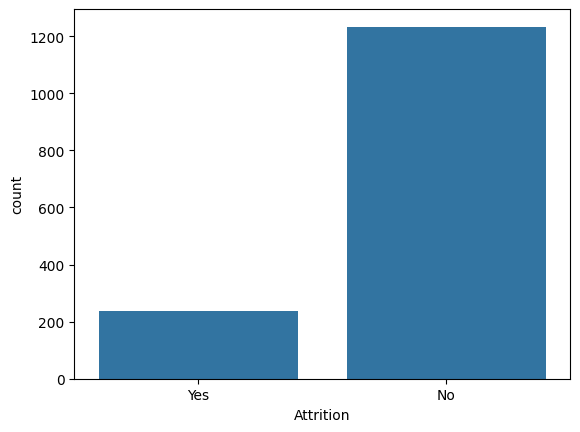

In [ ]:
sns.countplot(x='Attrition', data=df)

In [ ]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)

df['Attrition'] = df.Attrition.astype("category").cat.codes

### **Data Processing**

In [ ]:
categorical_col.remove('Attrition')

In [ ]:
# Transform categorical data into dummies
# categorical_col.remove("Attrition")
# data = pd.get_dummies(df, columns=categorical_col)
# data.info()
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## **Applying Tree & Random Forest algorithms**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

### **1. Decision Tree Classifier**

**Decision Tree Parameters :**

- **criterion** =  Berfungsi untuk mengukur kualitas suatu split. Kriteria yang didukung adalah `“gini”` untuk **Gini Impurity** dan `“entropi”` untuk **Information Gain**.
- **Splitter** = Strategi yang digunakan untuk memilih split pada setiap node. Strategi yang didukung adalah `“best”` untuk memilih split terbaik dan `“random”` untuk memilih `"best"` random split terbaik.
- **max_depth** = Maximum depth dari tree. Jika tidak Ada, maka node diperluas hingga semua leaves(daun) murni atau hingga semua leaves(daun) berisi kurang dari `min_samples_split` sampel.
- **min_samples_split** = Jumlah minimum sampel yang diperlukan untuk split an internal node.
- **min_samples_leaf** = Jumlah minimum sampel yang diperlukan untuk berada pada leaf node. Split point pada depth berapa pun hanya akan dipertimbangkan jika leaves(daun) setidaknya `min_samples_leaf` training sample di masing-masing left and right branches. Hal ini mungkin mempunyai efek memperhalus model, terutama dalam regression.
- **min_weight_fraction_leaf** = The minimum weighted fraction dari sum total of weights (dari semua sampel input) yang diperlukan untuk berada pada leaf node. Sampel memiliki weight yang sama jika sample_weight tidak disediakan.
- **max_features** = Jumlah features yang perlu dipertimbangkan saat mencari best splitting.
- **max_leaf_nodes** = Grow sebuah tre dengan max_leaf_nodes dengan cara best-first. Best nodes didefinisikan sebagai relative reduction in impurity. Jika Tidak Ada makaunlimited number of leaf nodes.
- **min_impurity_decrease** = Sebuah node akan split jika split ini menyebabkan the impurity lebih besar atau sama dengan nilai ini.
- **min_impurity_split** = Threshold penghentian dini pertumbuhan tree. Sebuah node akan split jika impurity berada di atas threshold, jika tidak maka ia adalah leaf.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:
Accuracy Score: 77.78%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.887363   0.259740  0.777778    0.573551      0.800549
recall       0.850000   0.327869  0.777778    0.588934      0.777778
f1-score     0.868280   0.289855  0.777778    0.579067      0.788271
support    380.000000  61.000000  0.777778  441.000000    441.000000
_______________________________________________
Conf

#### **Decision Tree Classifier Hyperparameter Tuning**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(
    tree_clf,
    params,
    scoring="f1",
    n_jobs=-1,
    verbose=1,
    cv=5
)

tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)


Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 19, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 86.78%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.887568    0.692308  0.867833     0.789938      0.854170
recall       0.962485    0.409091  0.867833     0.685788      0.867833
f1-score     0.923510    0.514286  0.867833     0.718898      0.853516
support    853.000000  176.000000  0.867833  1029.000000   1029.000000
_______________________________________________
Confusion Matrix: 
 [[821  32]
 [104  72]]

Test Result:
Accuracy Score: 87.30%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.891304   0.592593  0.873016    0.741948      0.849986
recall  

#### **Visualization of a tree**

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns)
features.remove("Attrition")

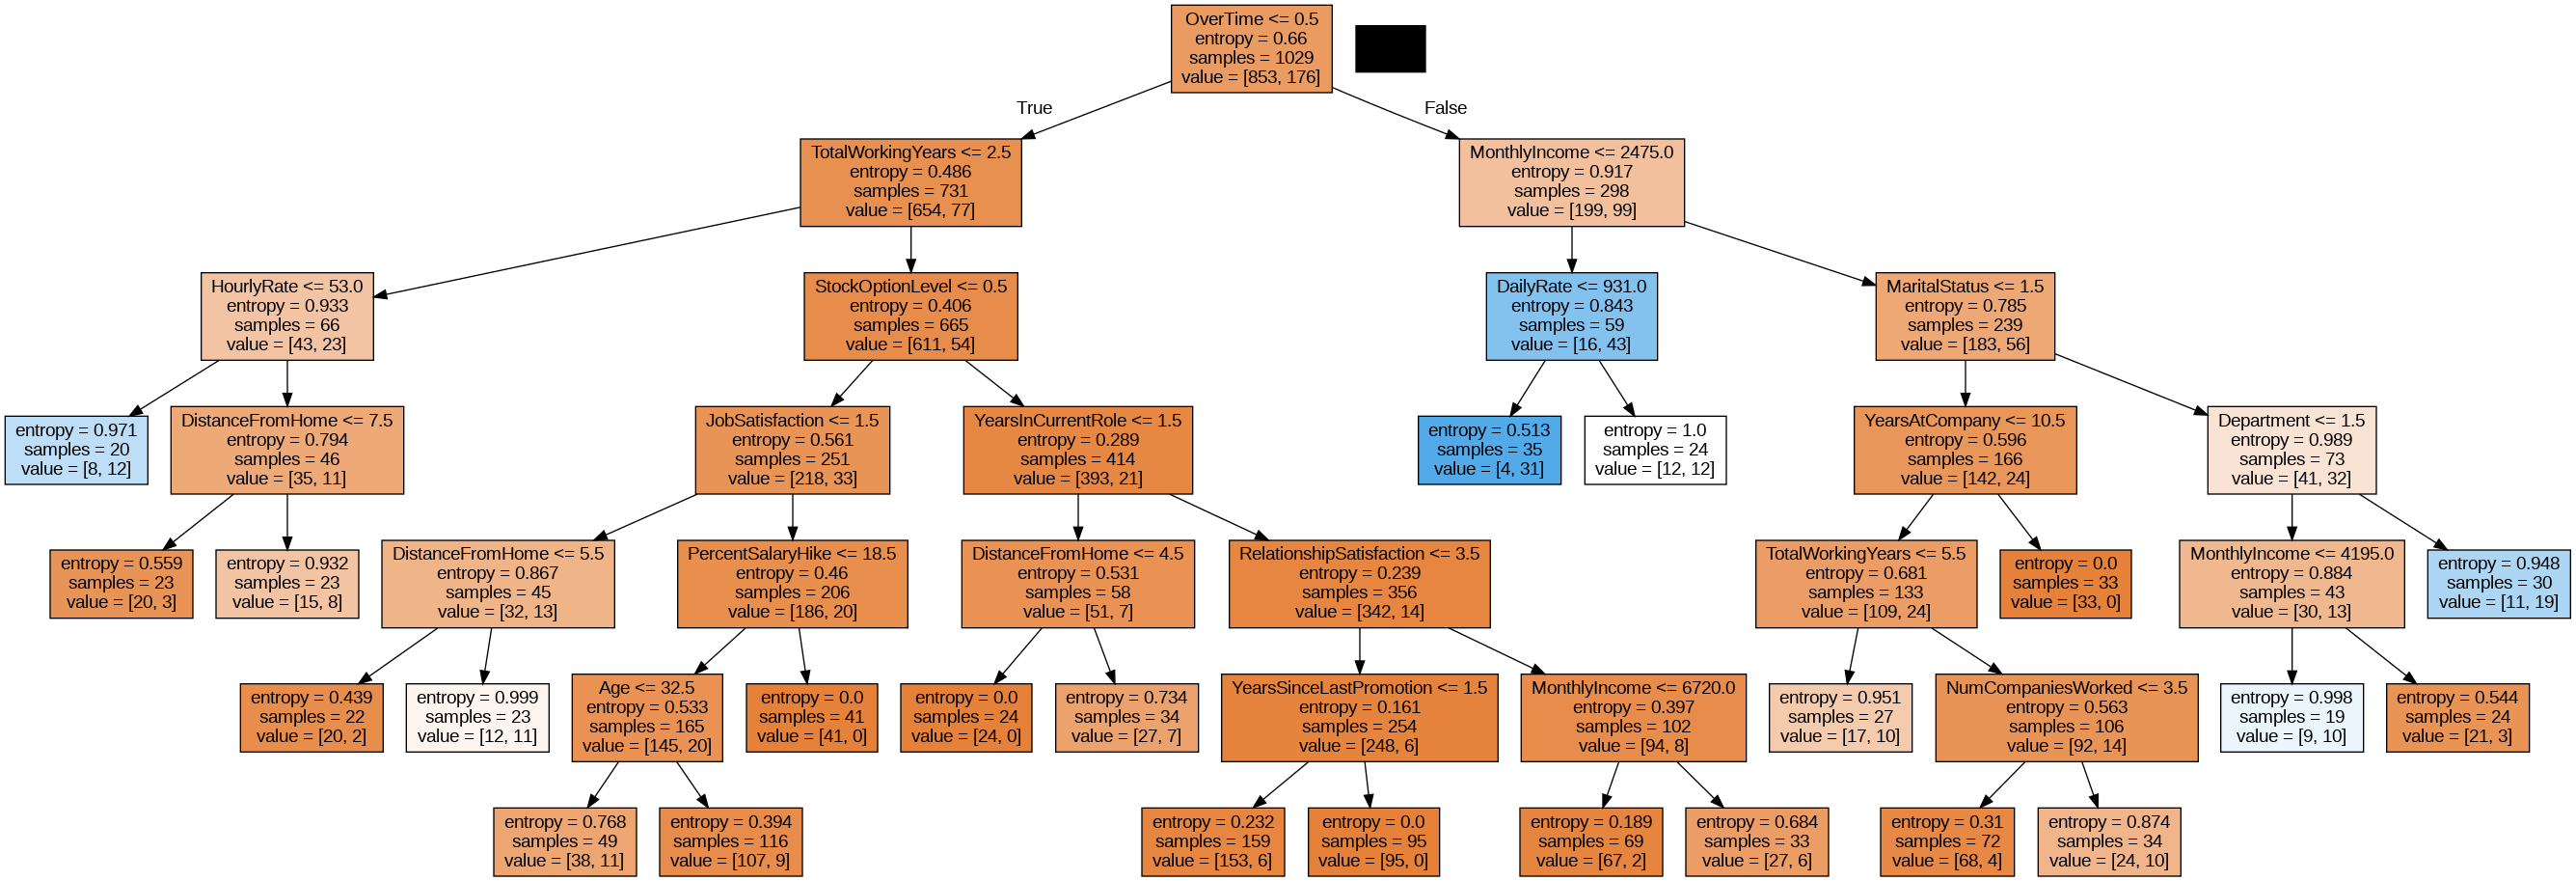

In [ ]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

### **2. Random Forest**

Random Forest adalah penduga meta yang menyesuaikan sejumlah decision tree classifiers pada berbagai subsampel dataset dan menggunakan rata-rata untuk meningkatkan  predictive accuracy and control over-fitting.

**Random Forest Parameters**
- **n_estimators** = Jumlah tree pada forest.
- **criterion** = Berfungsi untuk mengukur kualitas suatu split. Kriteria yang didukung adalah `“gini”` untuk **Gini Impurity** dan `“entropi”` untuk **Information Gain**.
-  **max_depth** = Maximum depth dari tree. Jika tidak Ada, maka node diperluas hingga semua leaves(daun) murni atau hingga semua leaves(daun) berisi kurang dari `min_samples_split` sampel.
- **min_samples_split** = Jumlah minimum sampel yang diperlukan untuk split an internal node.
- **min_samples_leaf** = Jumlah minimum sampel yang diperlukan untuk berada pada leaf node. Split point pada depth berapa pun hanya akan dipertimbangkan jika leaves(daun) setidaknya `min_samples_leaf` training sample di masing-masing left and right branches. Hal ini mungkin mempunyai efek memperhalus model, terutama dalam regression.
- **min_weight_fraction_leaf** = The minimum weighted fraction dari sum total of weights (dari semua sampel input) yang diperlukan untuk berada pada leaf node. Sampel memiliki weight yang sama jika sample_weight tidak disediakan.
- **max_features** = Jumlah features yang perlu dipertimbangkan saat mencari best splitting.
- **max_leaf_nodes** = Grow sebuah tre dengan max_leaf_nodes dengan cara best-first. Best nodes didefinisikan sebagai relative reduction in impurity. Jika Tidak Ada makaunlimited number of leaf nodes.
- **min_impurity_decrease** = Sebuah node akan split jika split ini menyebabkan the impurity lebih besar atau sama dengan nilai ini.
- **min_impurity_split** = Threshold penghentian dini pertumbuhan tree. Sebuah node akan split jika impurity berada di atas threshold, jika tidak maka ia adalah leaf.
- **bootstrap** = Apakah sampel bootstrap digunakan saat membuat tree. Jika False, seluruh dataset digunakan untuk membangun setiap tree.
- **oob_score** = Apakah akan menggunakan sampel siap pakai untuk memperkirakan generalization accuracy.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:
Accuracy Score: 86.17%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.870070   0.500000  0.861678    0.685035      0.818881
recall       0.986842   0.081967  0.861678    0.534405      0.861678
f1-score     0.924784   0.140845  0.861678    0.532815      0.816348
support    380.000000  61.000000  0.861678  441.000000    441.000000
_______________________________________________
Conf

### **Random Forest Hyperparameter Tuning**

#### **a. Randomized Search Cross Validation**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(
    estimator=rf_clf,
    scoring='f1',
    param_distributions=random_grid,
    n_iter=200,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best paramters: {'n_estimators': 1800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False})


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Train Result:
Accuracy Score: 99.03%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.988413    1.000000  0.990282     0.994206      0.990394
recall       1.000000    0.943182  0.990282     0.971591      0.990282
f1-score     0.994172    0.970760  0.990282     0.982466      0.990168
support    853.000000  176.000000  0.990282  1029.000000   1029.000000
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [ 10 166]]

Test Result:
Accuracy Score: 86.17%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.870070   0.500000  0.861678    0.685035      0.818881
recall       0.986842   0.081967  0.861678    0.534405      0.861678
f1-score     0.924784   0.140845  0.861678    0.532815      0.816348
support    380.000000  61.000000  0.861678  441.000000    441.

#### **b. Grid Search Cross Validation**

In [ ]:
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(
    rf_clf,
    params_grid,
    scoring="f1",
    cv=5,
    verbose=1,
    n_jobs=-1
)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:
Accuracy Score: 86.17%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.871795   0.500000  0.861678    0.685897      0.820367
recall       0.984211   0.098361  0.861678    0.541286      0.861678
f1-score     0.924598   0.164384  0.861678    0.544491      0.819444
support    380.000000  61.000000  0.861678  441.000000    441.000000
_______________________________________________
Conf

### **Summary**

In this notebook we learned the following lessons:

- Decision Tree & Random Forest dan parameter masing-masing algoritma.
- Cara menggunakan hyperparameter untuk Decision Tree & Random Forest.
- Balance dataset Anda sebelum training untuk mencegah tree menjadi bias terhadap class yang dominan.
>- Dengan mengambil sampel dalam jumlah yang sama dari setiap kelas
>- Dengan menormalkan jumlah bobot sampel (sample_weight) untuk setiap kelas ke nilai yang sama.